## Optimize Booth function given by f(x,y)=(x+2y-7)^{2}+(2x+y-5)^{2}

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib notebook
plt.style.use('seaborn-white')
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 20

In [3]:
x=tf.Variable(0,dtype=tf.float32)
y=tf.Variable(0,dtype=tf.float32)

func=(x+2*y-7)**2+(2*x+y-5)**2

#sq_err=(func-0)**2
#abs_err=np.abs(func)
#cost=tf.gradients(ys=func,xs=[x,y]) #Compute the derivative of cost

In [7]:
nsteps=100

err=func
costs=np.zeros(nsteps,float)
train=tf.train.GradientDescentOptimizer(0.1).minimize(err)
#train=tf.train.AdamOptimizer(0.1).minimize(err)
init = tf.global_variables_initializer() #MUST run this after choosing the optimizer so all values are initialized

with tf.Session() as session: #Using this form lets Python clean up if there is an exception
    session.run(init)
    for i in range(nsteps):
        costs[i]=np.asarray(session.run([train,err])[1])
    print (session.run([x,y,err]))


[0.9999999, 2.9999995, 1.8189894e-12]


<IPython.core.display.Javascript object>


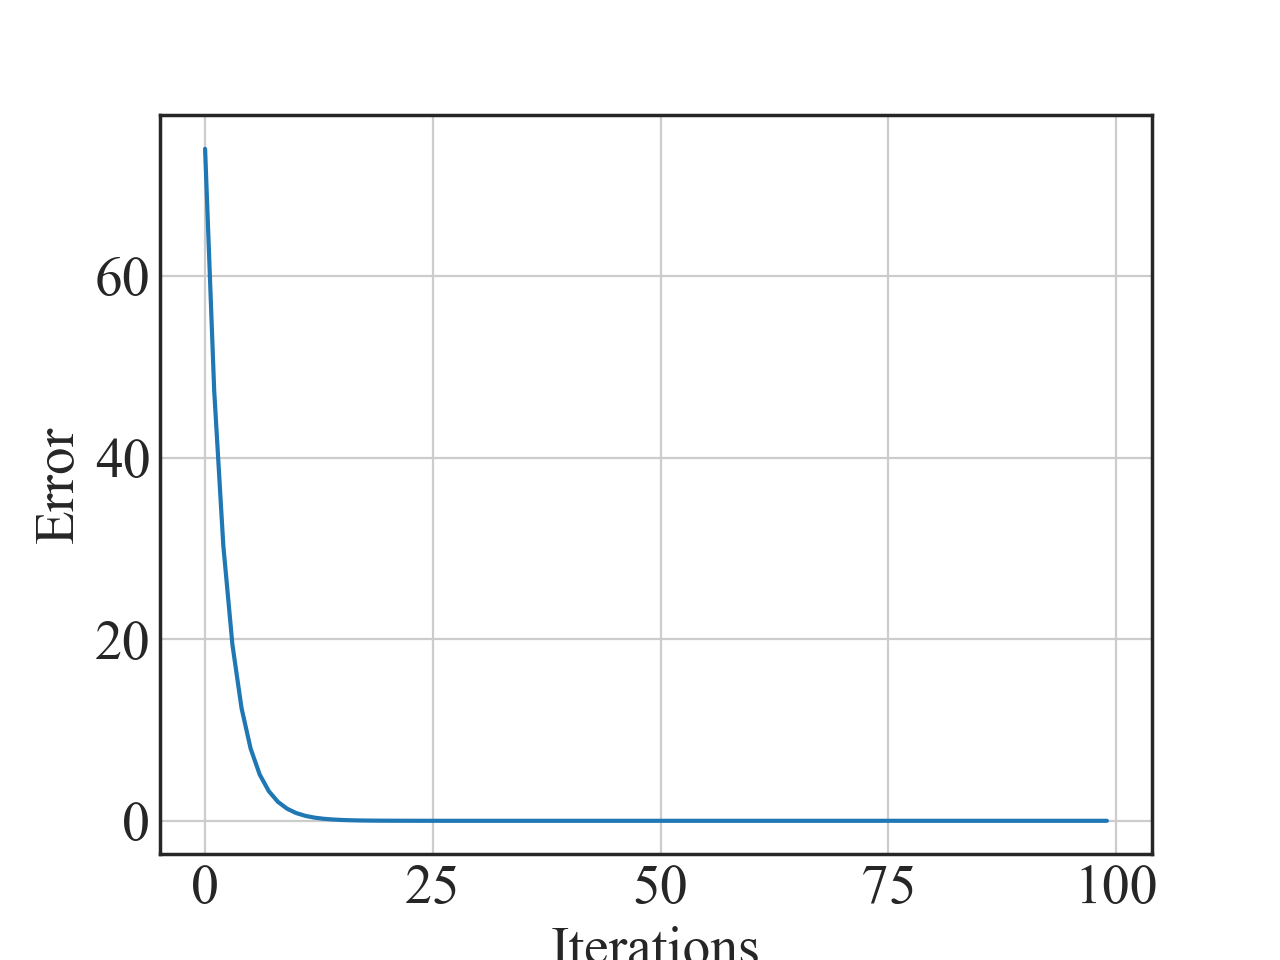

Text(0.5,0,'Iterations')

In [20]:
fig1,ax=plt.subplots(1,1)
ax.plot(costs)
plt.grid()
plt.ylabel('Error')
plt.xlabel('Iterations')

<IPython.core.display.Javascript object>


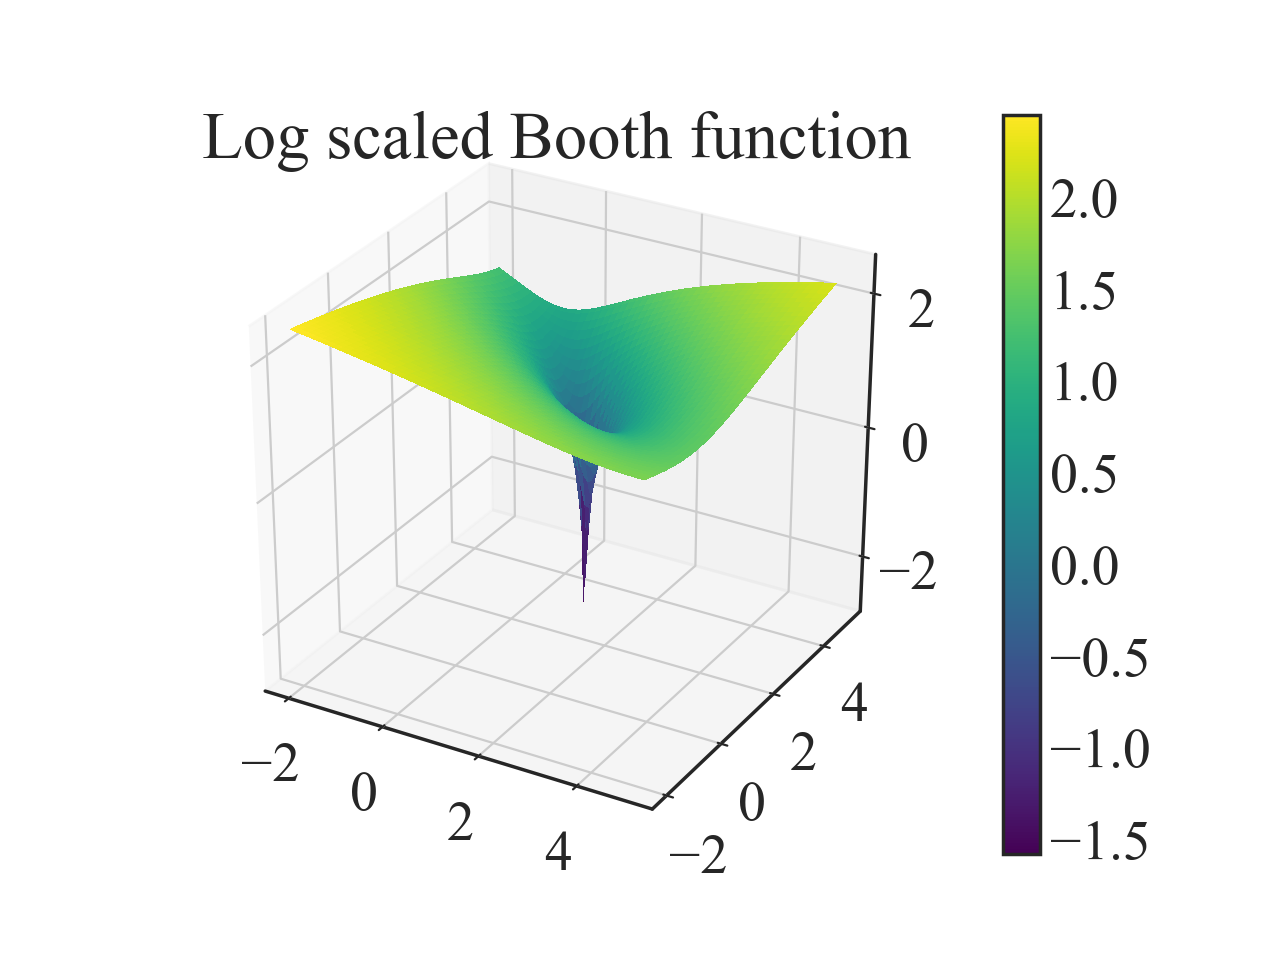

In [19]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
x2=np.linspace(-2,5,100)
y2=np.linspace(-2,5,100)
X, Y = np.meshgrid(x2, y2)
def z(x,y):
    return (x+2*y-7)**2+(2*x+y-5)**2

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, np.log10(z(X,Y)),linewidth=0, antialiased=False, cmap=cm.viridis)
ax.set_title("Log scaled Booth function")
plt.colorbar(surf)